<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Part_3/02_transfer_learning/02_transfer_learning.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  Transfer learning                 #
###############################################

In [ ]:
# Change: Runtime to GPU

In [ ]:
# Check GPU details
!nvidia-smi

Sat Nov  1 23:45:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   29C    P0             44W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
import matplotlib.pyplot as plt                                       # Data plotting/visualization
import tensorflow as tf                                               # Machine learning
import os                                                             # Interaction with the operating system

In [ ]:
# Install gdown
!pip install -q gdown

In [ ]:
# Download BUS.zip dataset
!gdown --id 106xkYVyhRMCbbAi5J-9c9yC_4RypjjL2 --output BUS.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=106xkYVyhRMCbbAi5J-9c9yC_4RypjjL2
From (redirected): https://drive.google.com/uc?id=106xkYVyhRMCbbAi5J-9c9yC_4RypjjL2&confirm=t&uuid=a4ebf51b-c1a2-458c-ac62-a5819411fc64
To: /content/BUS.zip
100% 38.5M/38.5M [00:00<00:00, 68.2MB/s]


In [ ]:
# Unzip BUS.zip file
!unzip '/content/BUS.zip' -d '/content/'

Archive:  /content/BUS.zip
   creating: /content/BUS/
   creating: /content/BUS/test/
   creating: /content/BUS/test/benign/
  inflating: /content/BUS/test/benign/bus_0005-l.png  
  inflating: /content/BUS/test/benign/bus_0005-r.png  
  inflating: /content/BUS/test/benign/bus_0028-l.png  
  inflating: /content/BUS/test/benign/bus_0028-r.png  
  inflating: /content/BUS/test/benign/bus_0029-l.png  
  inflating: /content/BUS/test/benign/bus_0029-r.png  
  inflating: /content/BUS/test/benign/bus_0034-l.png  
  inflating: /content/BUS/test/benign/bus_0034-r.png  
  inflating: /content/BUS/test/benign/bus_0037-l.png  
  inflating: /content/BUS/test/benign/bus_0037-r.png  
  inflating: /content/BUS/test/benign/bus_0038-l.png  
  inflating: /content/BUS/test/benign/bus_0038-r.png  
  inflating: /content/BUS/test/benign/bus_0042-l.png  
  inflating: /content/BUS/test/benign/bus_0042-r.png  
  inflating: /content/BUS/test/benign/bus_0053-l.png  
  inflating: /content/BUS/test/benign/bus_0053-r.p

In [ ]:
# Remove BUS.zip file
!rm '/content/BUS.zip'

In [ ]:
# Download MIAS.zip dataset
!gdown --id 1VPOMgr_er2f95cQdhqMtAAKIH-bbHO6e --output MIAS.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1VPOMgr_er2f95cQdhqMtAAKIH-bbHO6e
From (redirected): https://drive.google.com/uc?id=1VPOMgr_er2f95cQdhqMtAAKIH-bbHO6e&confirm=t&uuid=4c34be4f-a936-48e0-ad3b-98c00e9c9e1b
To: /content/MIAS.zip
100% 68.2M/68.2M [00:00<00:00, 75.1MB/s]


In [ ]:
# Unzip MIAS.zip file
!unzip '/content/MIAS.zip' -d '/content/'

Archive:  /content/MIAS.zip
   creating: /content/MIAS/
   creating: /content/MIAS/test/
   creating: /content/MIAS/test/dense-glandular/
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.21.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.25.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.47.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.49.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.56.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.6.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.7.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.76.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.88.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.89.png  
  inflating: /content/MIAS/test/dense-glandular/dense-glandular.94.png  
   creating: /content/MIAS/test/fatty/
  inflating: /content/

In [ ]:
# Remove MIAS.zip file
!rm '/content/MIAS.zip'

In [ ]:
# Paths
dataset = 'BUS' # 'MIAS'
path = '/content/' + dataset + '/'

train_dir = path + 'train/'
val_dir = path + 'valid/'
test_dir = path + 'test/'

Training images



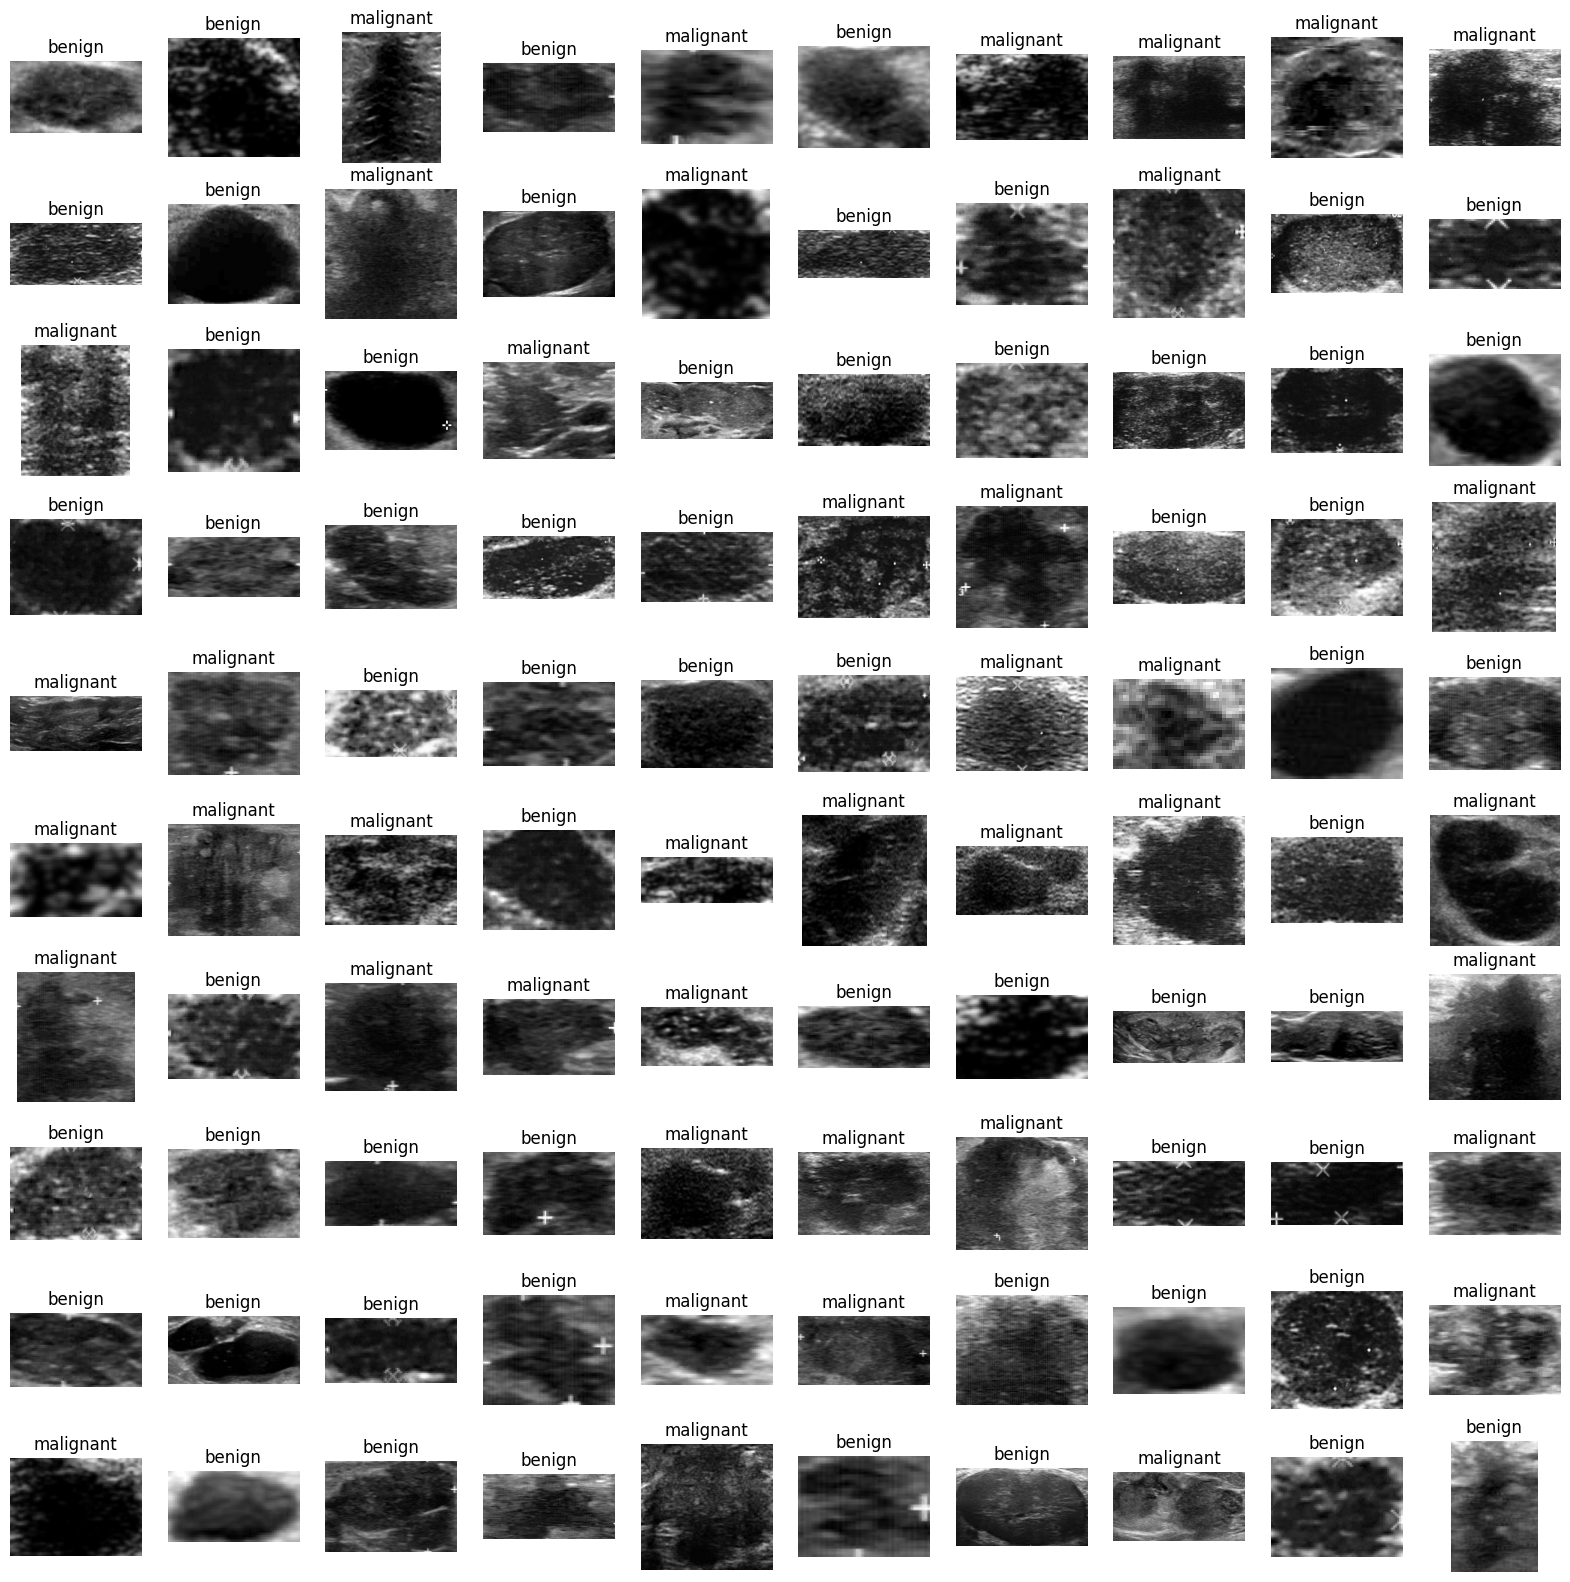

In [ ]:
# Data visualization
ncols = 10
nrows = 10

folders = os.listdir(train_dir)
pictures = []
clas = []

# Concatenating images
for folder in folders:
  pictures += [train_dir + folder + '/' + name for name in os.listdir(train_dir + folder)]
  clas += [folder for name in os.listdir(train_dir + folder)]

# Shuffle data
ind = np.random.permutation(len(clas))
pictures = np.array(pictures)[ind]
clas = np.array(clas)[ind]

# Create figure
fig, axs = plt.subplots(figsize=(20, 20))
plt.axis('off')

print('Training images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  img = plt.imread(pictures[i])
  axs.imshow(img, cmap='gray')
  axs.axis('off')

  label = str(clas[i])
  plt.title(label)

plt.show()

In [ ]:
# Batch generation
data_augmentation = True

# Data augmentation
if data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,
                                                                zoom_range=0.2,
                                                                rotation_range=0.2,
                                                                # shear_range=0.2,
                                                                horizontal_flip=True)
else:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)

batch_size = 32

# Checking number of classes
if dataset == 'BUS':
  class_mode = 'binary'
  outputs_n = 1
  activation = 'sigmoid'
  loss = 'binary_crossentropy'

else:
  class_mode = 'categorical'
  outputs_n = 3
  activation = 'softmax'
  loss = 'categorical_crossentropy'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = class_mode)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = class_mode)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = class_mode)

Found 2358 images belonging to 2 classes.
Found 261 images belonging to 2 classes.
Found 668 images belonging to 2 classes.


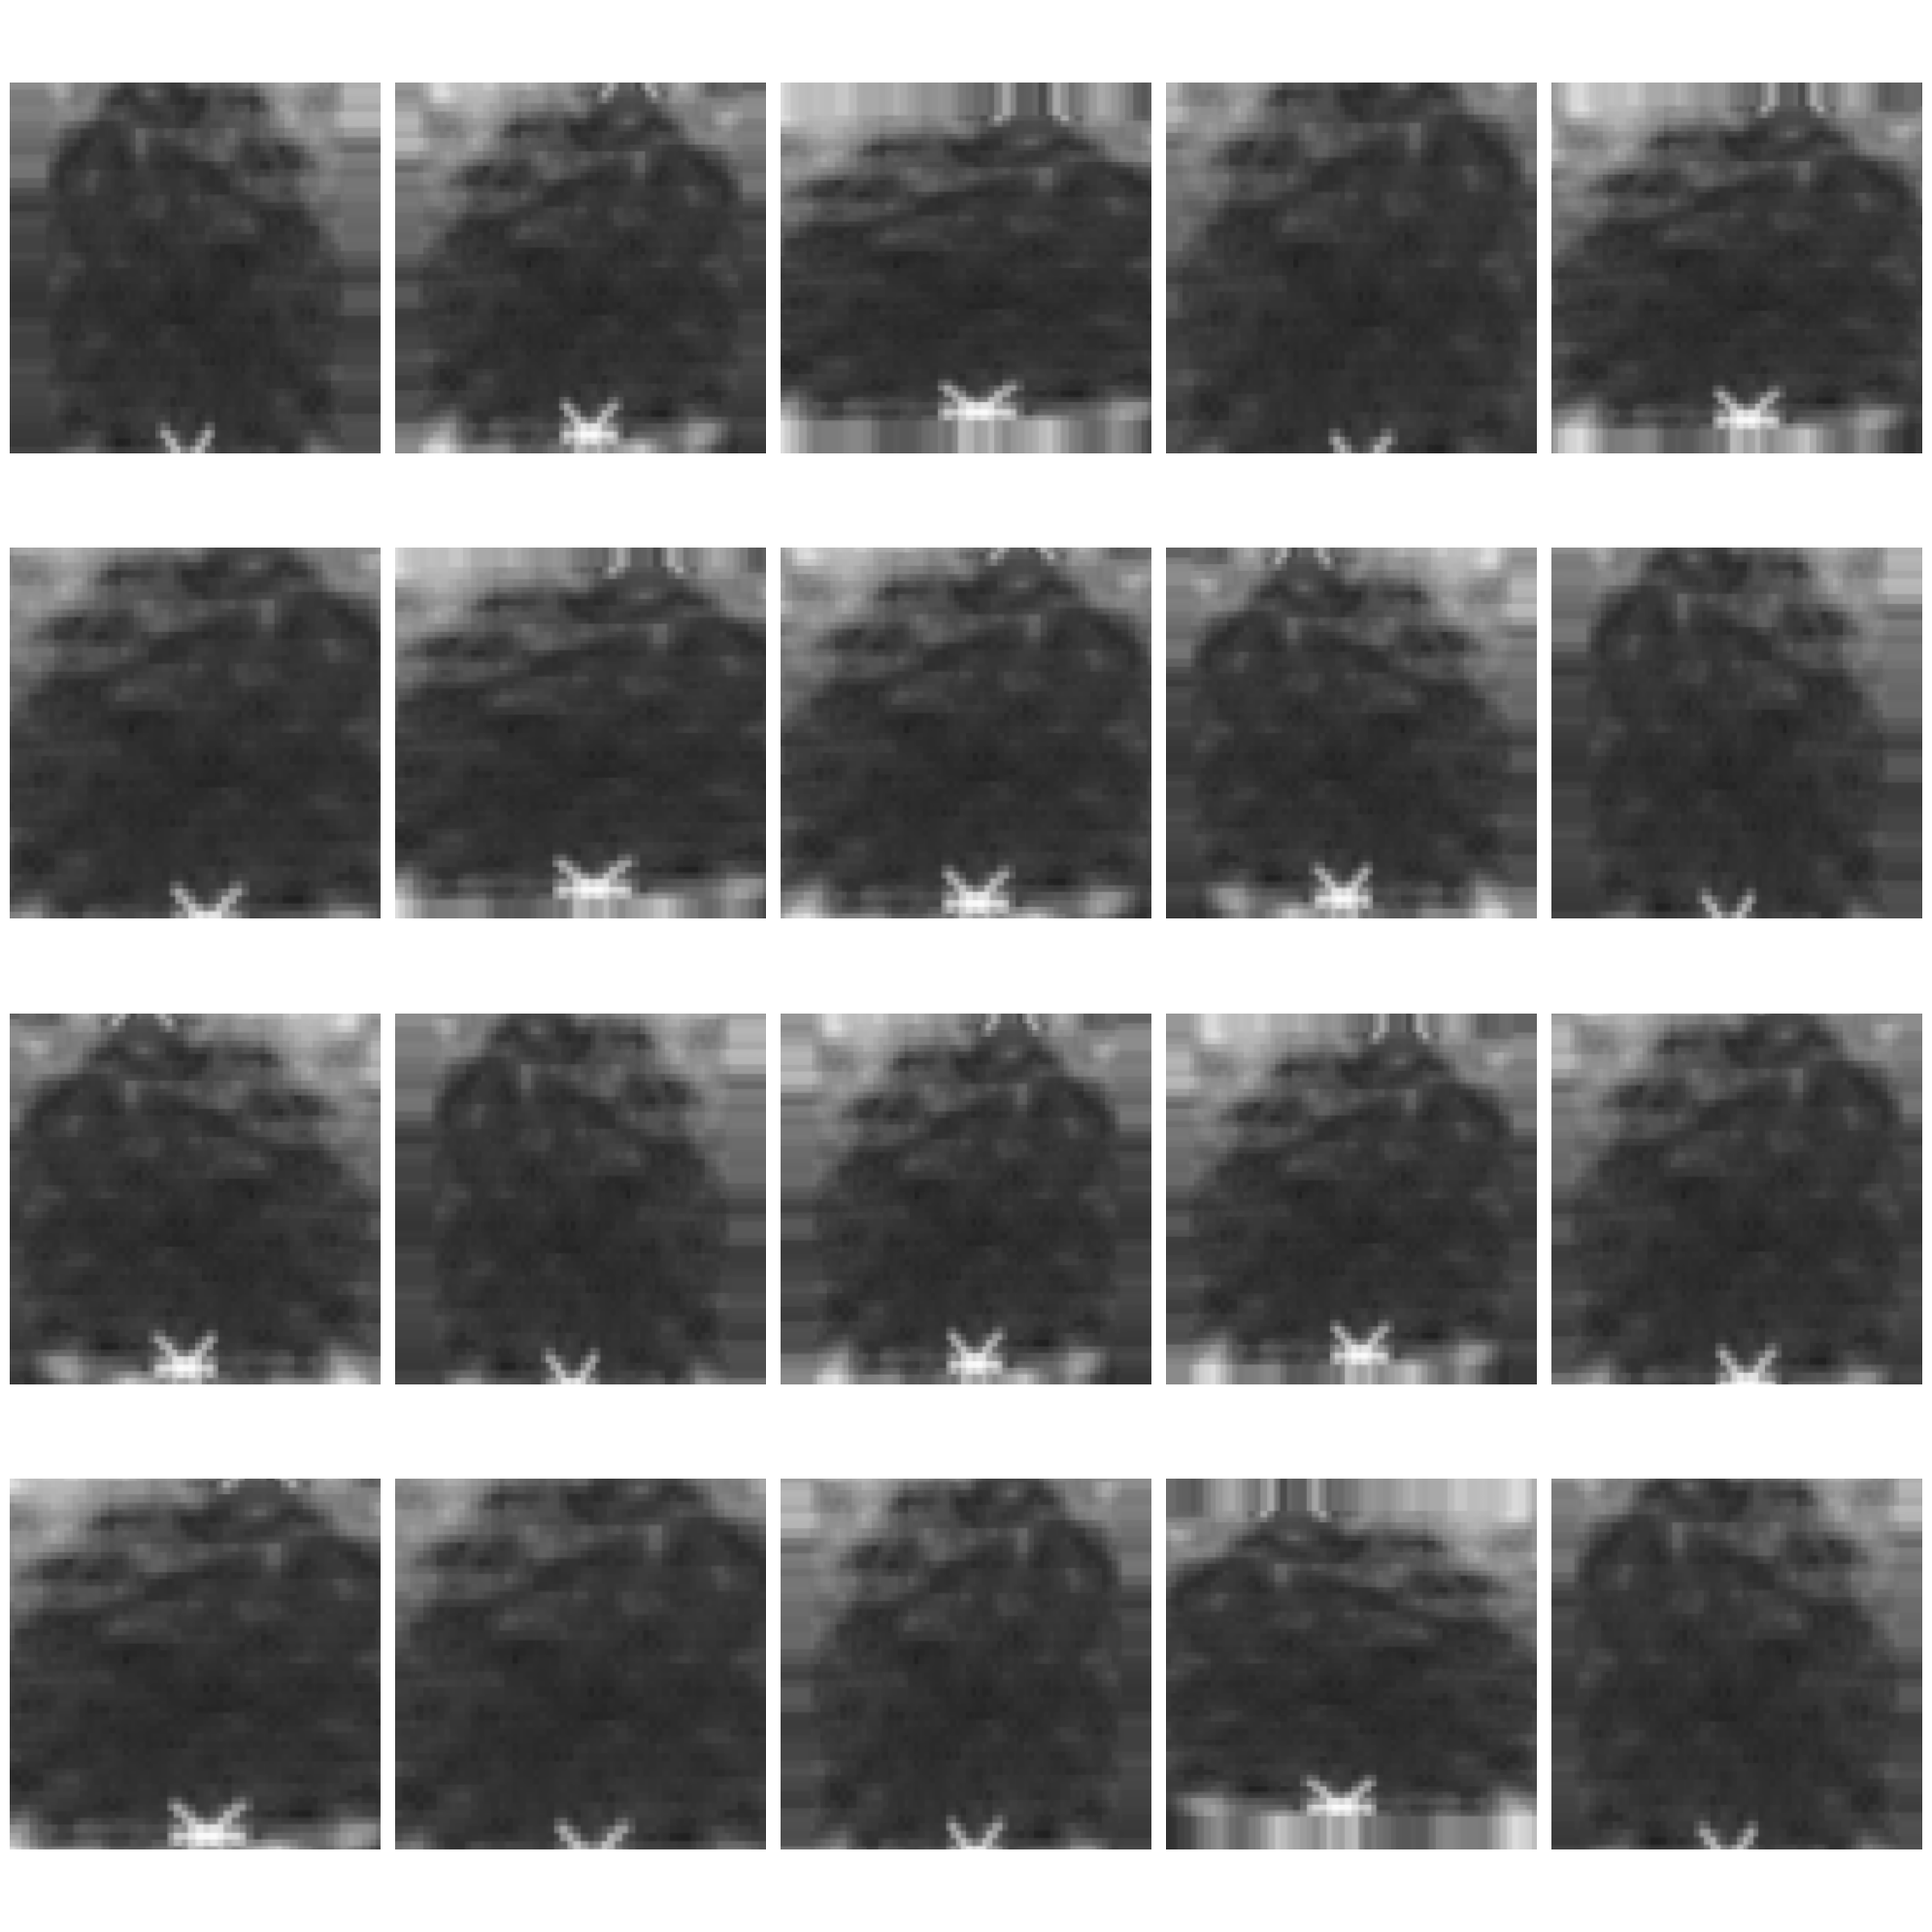

In [ ]:
# Visualización del aumento de datos
def plottingImages(images):
    plt.subplots(figsize = (20, 20))
    cols = 5
    rows = len(images) // cols
    plt.axis('off')

    for c, img in enumerate(images):
        plt.subplot(rows, cols, c + 1)
        plt.imshow(img, cmap = 'gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

augmented_images = [train_generator[0][0][0] for i in range(20)]
plottingImages(augmented_images)

In [ ]:
# Transfer learning
conv_base = tf.keras.applications.VGG19(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3))

conv_base.trainable = False

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# Assembling model
inputs = tf.keras.Input(shape = (224, 224, 3))
x = conv_base(inputs)
# x = tf.keras.layers.GlobalMaxPooling2D()(x) # Original
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

outputs = tf.keras.layers.Dense(outputs_n, activation = activation)(x)

# Assembling model
model = tf.keras.Model(inputs, outputs)

In [ ]:
# Model description
print('Model summary\n\n')
model.summary()

# Graphic representation
print('Graphic representation')
# tf.keras.utils.plot_model(model)

Model summary




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,081,153 (80.42 MB)

 Trainable params: 1,053,697 (4.02 MB)

 Non-trainable params: 20,027,456 (76.40 MB)

Graphic representation


In [ ]:
# Compile model
adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])

In [ ]:
# Callbacks
# Path
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=6,
    restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.1,
    patience=3,
    min_lr=1e-6,
    verbose=1)

In [ ]:
# Train model
epochs = 40
history = model.fit(train_generator,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(val_generator),
                    verbose=2,
                    callbacks=[early_stop, reduce_lr])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
74/74 - 45s - 604ms/step - accuracy: 0.6874 - loss: 0.7425 - val_accuracy: 0.6245 - val_loss: 0.6311 - learning_rate: 1.0000e-03
Epoch 2/40
74/74 - 24s - 327ms/step - accuracy: 0.7294 - loss: 0.5816 - val_accuracy: 0.6245 - val_loss: 0.6616 - learning_rate: 1.0000e-03
Epoch 3/40
74/74 - 24s - 329ms/step - accuracy: 0.7392 - loss: 0.5805 - val_accuracy: 0.7318 - val_loss: 0.6072 - learning_rate: 1.0000e-03
Epoch 4/40
74/74 - 24s - 330ms/step - accuracy: 0.7511 - loss: 0.5467 - val_accuracy: 0.7433 - val_loss: 0.5399 - learning_rate: 1.0000e-03
Epoch 5/40
74/74 - 24s - 330ms/step - accuracy: 0.7502 - loss: 0.5267 - val_accuracy: 0.6552 - val_loss: 0.6172 - learning_rate: 1.0000e-03
Epoch 6/40
74/74 - 24s - 330ms/step - accuracy: 0.7489 - loss: 0.5282 - val_accuracy: 0.7395 - val_loss: 0.5715 - learning_rate: 1.0000e-03
Epoch 7/40
74/74 - 24s - 328ms/step - accuracy: 0.7638 - loss: 0.5030 - val_accuracy: 0.7969 - val_loss: 0.4583 - learning_rate: 1.0000e-03
Epoch 8/40
74/74 - 2

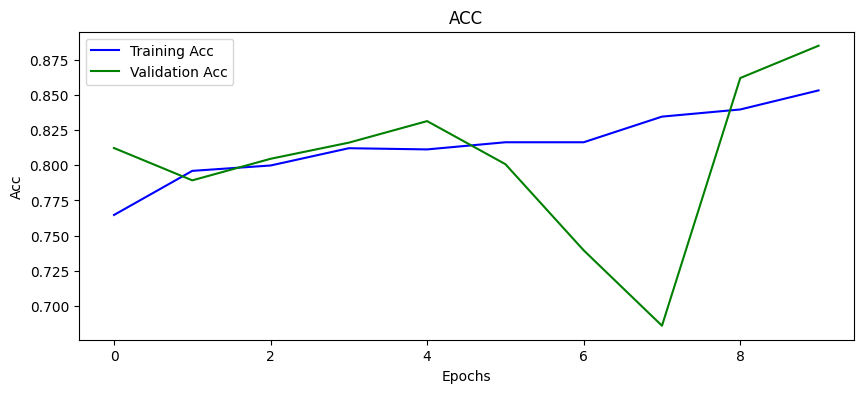

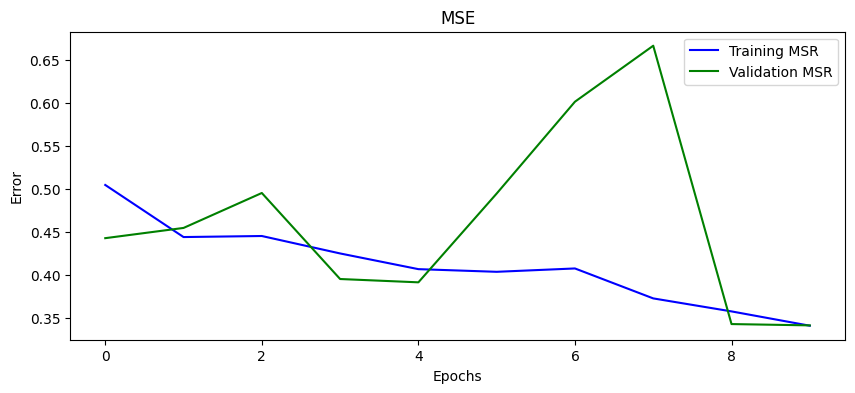

In [ ]:
# Training and validation graphs
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epocas = np.arange(len(training_loss))

plt.figure(figsize=(10, 4))
plt.plot(epocas, training_acc, color='blue', label='Training Acc')
plt.plot(epocas, validation_acc, color = 'green', label='Validation Acc')
plt.title('ACC')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
print()

plt.figure(figsize = (10, 4))
plt.plot(epocas, training_loss, color='blue', label='Training MSR')
plt.plot(epocas, validation_loss, color = 'green', label='Validation MSR')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Layers of the model
for i, layer in enumerate(conv_base.layers[:10]):
  print(f'{i}: {layer.name}')

0: input_layer
1: block1_conv1
2: block1_conv2
3: block1_pool
4: block2_conv1
5: block2_conv2
6: block2_pool
7: block3_conv1
8: block3_conv2
9: block3_conv3


In [ ]:
# Fine tunning
conv_base.trainable = True

# Freeze first few layers
fine_tune_at = 6
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable = False

# Compile model
adam = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])

# Train model
epochs = 10
history = model.fit(train_generator,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(val_generator),
                    verbose=2,
                    callbacks=[early_stop, reduce_lr])

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.81226, saving model to /content/drive/MyDrive/AI-Course/Day_3/best_VGG19_model.keras
74/74 - 52s - 706ms/step - accuracy: 0.7646 - loss: 0.5044 - val_accuracy: 0.8123 - val_loss: 0.4425 - learning_rate: 1.0000e-05
Epoch 2/10

Epoch 2: val_accuracy did not improve from 0.81226
74/74 - 25s - 335ms/step - accuracy: 0.7960 - loss: 0.4438 - val_accuracy: 0.7893 - val_loss: 0.4544 - learning_rate: 1.0000e-05
Epoch 3/10

Epoch 3: val_accuracy did not improve from 0.81226
74/74 - 24s - 329ms/step - accuracy: 0.7998 - loss: 0.4450 - val_accuracy: 0.8046 - val_loss: 0.4951 - learning_rate: 1.0000e-05
Epoch 4/10

Epoch 4: val_accuracy improved from 0.81226 to 0.81609, saving model to /content/drive/MyDrive/AI-Course/Day_3/best_VGG19_model.keras
74/74 - 26s - 347ms/step - accuracy: 0.8121 - loss: 0.4247 - val_accuracy: 0.8161 - val_loss: 0.3949 - learning_rate: 1.0000e-05
Epoch 5/10

Epoch 5: val_accuracy improved from 0.81609 to 0.83142, s

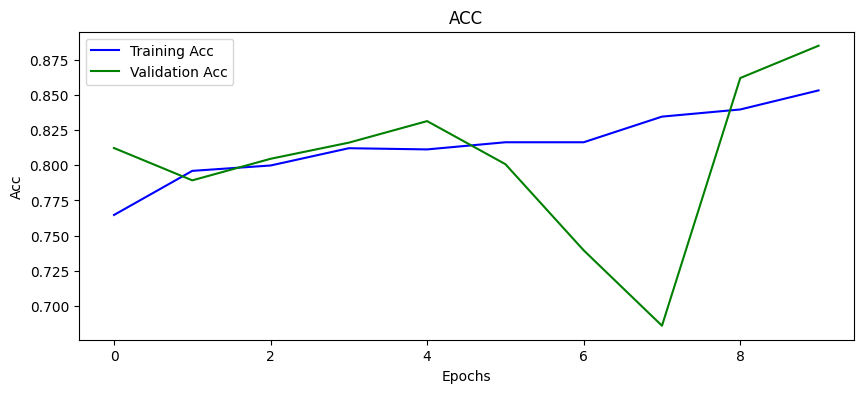

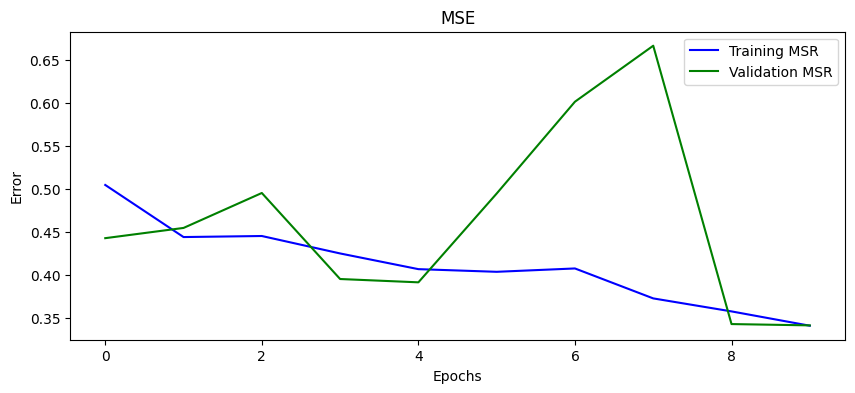

In [ ]:
# Training and validation graphs
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epocas = np.arange(len(training_loss))

plt.figure(figsize=(10, 4))
plt.plot(epocas, training_acc, color='blue', label='Training Acc')
plt.plot(epocas, validation_acc, color = 'green', label='Validation Acc')
plt.title('ACC')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
print()

plt.figure(figsize = (10, 4))
plt.plot(epocas, training_loss, color='blue', label='Training MSR')
plt.plot(epocas, validation_loss, color = 'green', label='Validation MSR')
plt.title('MSE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Model prediction
batch = next(test_generator)
images = batch[0]
targets = batch[1]

results = model.predict(images, verbose = 0)

In [ ]:
# Checking model predictions
if dataset == 'BUS':
  results = np.round(results)

else:
  results = np.argmax(results, axis = 1)

# Indexing classes
dict_classes = test_generator.class_indices
dict_classes = {v:k for k, v in dict_classes.items()}
print(dict_classes)

{0: 'benign', 1: 'malignant'}


Testing images



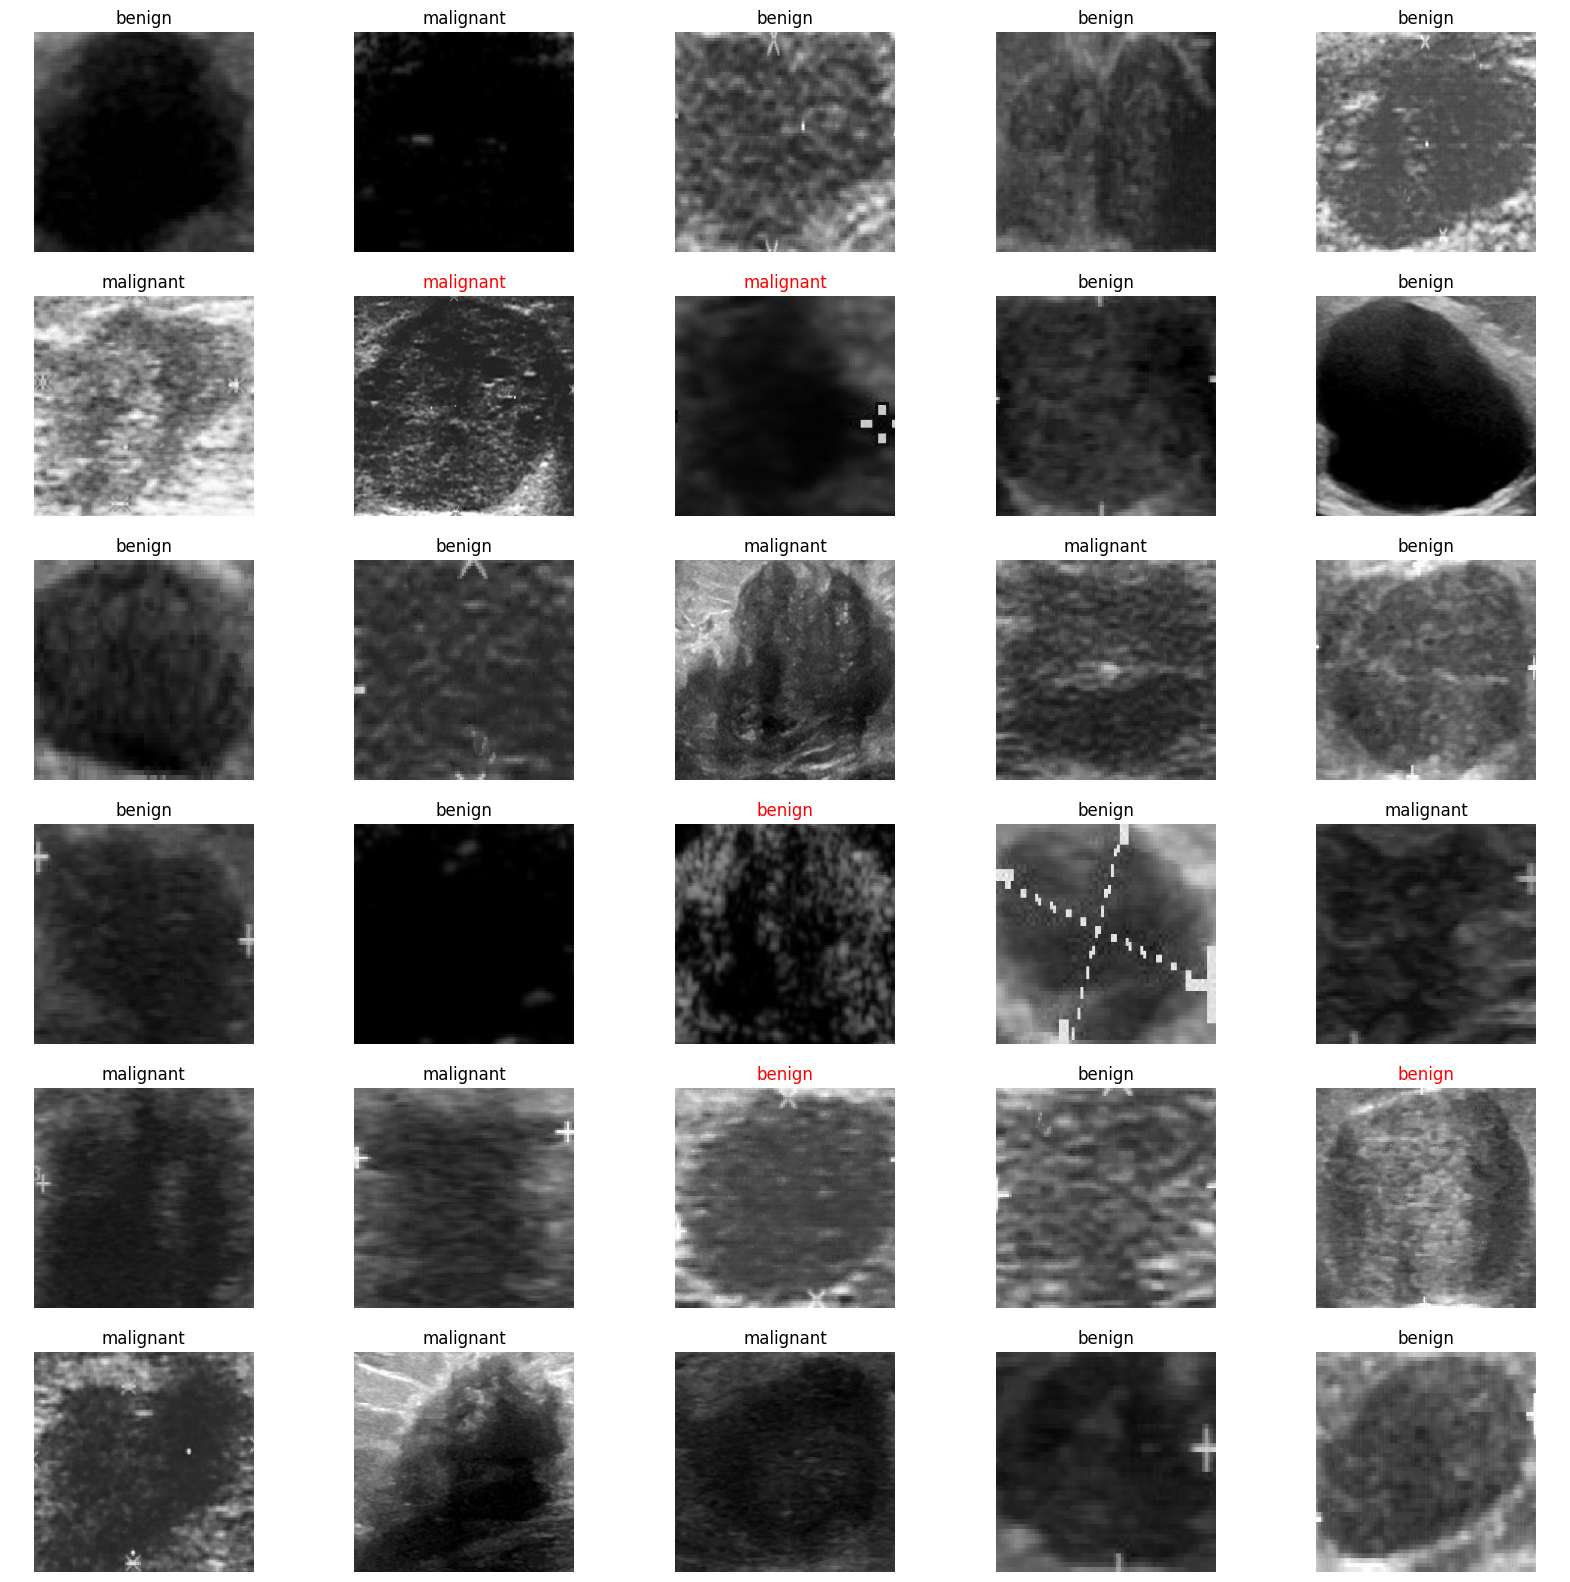

In [ ]:
# Data visualization
ncols = 5
nrows = 6

# Create figure
fig, axs = plt.subplots(figsize=(20, 20))
plt.axis('off')

print('Testing images\n')

for i in range(ncols * nrows):

  axs = fig.add_subplot(nrows, ncols, i + 1)
  axs.imshow(images[i], cmap='gray')
  axs.axis('off')

  if dataset == 'BUS':
    label = str(dict_classes[targets[i]])


    if targets[i] != results[i]:
      plt.title(label, color='red')

    else:
      plt.title(label)

  else:
    label = str(dict_classes[np.argmax(targets[i])])

    if np.argmax(targets[i]) != np.argmax(results[i]):
      plt.title(label, color='red')

    else:
      plt.title(label)


plt.show()

In [ ]:
# Model performance
loss_training, acc_training = model.evaluate(train_generator, verbose=0)
loss_validation, acc_validation = model.evaluate(val_generator, verbose=0)
loss_testing, acc_testing = model.evaluate(test_generator, verbose=0)

In [ ]:
# Print performance
print('Training loss:  ', loss_training)
print('Training acc:   ', acc_training)
print()
print('Validation loss:', loss_validation)
print('Validation acc: ', acc_validation)
print()
print('Test loss:      ', loss_testing)
print('Test acc:       ', acc_testing)

Training loss:   0.2970259189605713
Training acc:    0.8664122223854065

Validation loss: 0.34092503786087036
Validation acc:  0.8850574493408203

Test loss:       0.42182809114456177
Test acc:        0.8158682584762573
